# Pandas入门

一个能够使得数据分析工作变得更加简单高效的包含高级数据结构以及处理工具的库，基于NumPy构建，更加接近解决业务问题；

In [90]:
from pandas import Series, DataFrame
import pandas as pd
from pandas_datareader import data as webdata

import numpy as np

%matplotlib inline

In [2]:
def justsedf():
    return Series(np.random.randn(5), index=['A','B','C','D','E']),DataFrame(np.random.randn(3,3), index=['A','B','C'], columns=['1','2','3'])

## Pandas的数据结构

主要数据结构，为解决数据分析问题提供基础：
* Series
* DataFrame

### Series

Series类似于一维数组（跟字典也有点像），它由一组数据以及对应该组数据的索引组成（默认就是角标）；

#### 创建 

In [3]:
se = Series([1, 3, 5, 2, 6]) # 默认索引
se # 左侧是默认索引，角标index，右侧是对应的数组数据values

0    1
1    3
2    5
3    2
4    6
dtype: int64

In [4]:
se = Series([68, 44, 75], index=['HoLoong', 'Kael', 'Nemo']) # 指定的有意义的索引
se

HoLoong    68
Kael       44
Nemo       75
dtype: int64

In [5]:
Series({'A':11, 'C':33, 'B':22}) # 不使用index参数的字典构造（会自动按照key排序）

A    11
B    22
C    33
dtype: int64

In [6]:
Series({'A':11, 'C':33, 'B':22}, index=['A', 'B', 'C']) # 使用相同的key的index参数的字典构造

A    11
B    22
C    33
dtype: int64

In [7]:
Series({'A':11, 'C':33, 'B':22}, index=['D', 'B', 'C']) # 使用不同的key的index参数的字典构造，缺失的index值对应value为NaN

D     NaN
B    22.0
C    33.0
dtype: float64

#### 对比NumPy数组具有特殊索引

In [8]:
# 角标索引是默认的，使用特殊索引需要设置
print se[0]
print se['Nemo']
print se[['HoLoong', 'Kael']] # 可以通过传入[]来获取多个元素

68
75
HoLoong    68
Kael       44
dtype: int64


#### 数组运算会保留索引

In [9]:
se + 10

HoLoong    78
Kael       54
Nemo       85
dtype: int64

#### 看做定长字典

In [10]:
print se
print 'Kael' in se # key in dataset
print 'Murphy' in se

HoLoong    68
Kael       44
Nemo       75
dtype: int64
True
False


#### 算术运算中会自动对齐不同索引的数据（后续会细讲）

In [11]:
se1 = Series({'Nemo':56,'HoLoong':35,'Kael':44})
se2 = Series({'Nemo':25,'HeLong':32,'Kael':18})
se1 + se2

HeLong      NaN
HoLoong     NaN
Kael       62.0
Nemo       81.0
dtype: float64

#### Series以及其index属性都有一个name属性

In [12]:
se.name = '分数表'
se.index.name = '学员姓名'
se

学员姓名
HoLoong    68
Kael       44
Nemo       75
Name: 分数表, dtype: int64

#### Series的索引可以通过赋值的方式就地修改

In [13]:
se.index = ['HL', 'KL', 'NM']
se.index.name = '学员姓名缩写'
se

学员姓名缩写
HL    68
KL    44
NM    75
Name: 分数表, dtype: int64

### DataFrame

DataFrame是一个**表格型**的数据结构,它含有一组有序的列,每列可以是**不同**的值类型(数值、字符串、布尔值等)，DataFrame既有**行索引**也有**列索引**,它可以被看做由Series组成的字典(共用同一个索引)，跟其他类似的数据结构相比(如R的data.frame),DataFrame中面向行和面向列的操作基本上是**平衡**的，其实,DataFrame中的数据是以一个或多个**二维块**存放的(而不是列表、字典或别的一维数据结构)；

#### 创建

In [14]:
data = {
    'age':[18, 20, 19],
    'score':[68, 70, 56]
} # 这个是一列一列的来表示的
df = DataFrame(data) # 默认索引
df

,age,score
0,18,68
1,20,70
2,19,56


In [15]:
# 字典的字典，相当于同时指定了index和columns，外层字典key作为列，内层字典key作为行
data = {
    'age':{'HL':23,'NM':43},
    'score':{'HL':77,'NM':66}
} # 这个是一列一列的来表示的
df = DataFrame(data) # 默认索引
print df
print df.T # 转置过来

    age  score
HL   23     77
NM   43     66
       HL  NM
age    23  43
score  77  66


In [16]:
df = DataFrame(data, index=['Nemo', 'HoLoong', 'Kael']) # 指定索引，也就是行的名称
df

,age,score
Nemo,NaN,NaN
HoLoong,NaN,NaN
Kael,NaN,NaN


In [17]:
df = DataFrame(data, index=['Nemo', 'HoLoong', 'Kael'], columns=['score', 'age', 'state']) # 指定列的顺序，没有的置NaN
df

,score,age,state
Nemo,NaN,NaN,NaN
HoLoong,NaN,NaN,NaN
Kael,NaN,NaN,NaN


#### 行列的访问以及写入

In [18]:
df['age'] # 通过column访问列，得到一个具有索引和name的Series

Nemo      NaN
HoLoong   NaN
Kael      NaN
Name: age, dtype: float64

In [19]:
df.score # 同上效果

Nemo      NaN
HoLoong   NaN
Kael      NaN
Name: score, dtype: float64

In [20]:
df.ix['Nemo'] # 访问行需要通过ix属性

/home/helong/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


score    NaN
age      NaN
state    NaN
Name: Nemo, dtype: object

In [21]:
df.state = 'Unknown' # 写入列，使用标量
df

,score,age,state
Nemo,NaN,NaN,Unknown
HoLoong,NaN,NaN,Unknown
Kael,NaN,NaN,Unknown


In [22]:
df.state = ['Ohio', 'DC', 'NewYork'] # 长度需要跟df行数一致，否则报错
df

,score,age,state
Nemo,NaN,NaN,Ohio
HoLoong,NaN,NaN,DC
Kael,NaN,NaN,NewYork


In [23]:
df.state = Series({'Kael':'Beijing', 'Nemo':'Nanjing'}) # 缺少的那些索引对应的位置都会被设置为NaN，即使之前是有值的
df

,score,age,state
Nemo,NaN,NaN,Nanjing
HoLoong,NaN,NaN,NaN
Kael,NaN,NaN,Beijing


**警告**: 通过索引方式返回的列只是相应数据的视图而已,并**不是副本**，因此,对返回的Series所做的任何就地修改全都会反映到源DataFrame上，通过Series的**copy**方法即可显式地复制列；

#### DataFrame接受的各种数据

* 二维ndarray：数据矩阵，可以传入行标列标；
* 由数组、列表或元组组成的字典：每个序列作为DataFrame的一列，长度必须相等；
* NumPy的结构化/记录数组：类似于数组组成的字典；
* 由Series组成的字典：每个Series作为一列，如果没有指定索引，则由多个Series合并索引（并集）；
* 由字典组成的字典：内层每个字典作为一列，索引情况同上；
* 字典或Series的列表：各项会作为DataFrame的一行，字典key和Series索引会作为列标；
* 由列表或元组组成的列表：类似二维ndarray；
* 另一个DataFrame：除非显示指定索引，否则基本一致；
* NumPy的MaskedArray：类似二维ndarray，只是掩码值在结果DataFrame中表示为NA/缺失值；

#### 索引对象 Index

pandas的索引对象负责管理**轴标签**和其他**元数据**(比如轴名称等)，构建Series或DataFrame时，所用到的任何**数组**或其他**序列**的**标签**都会被转换成一个**Index**；
> 不可修改性（Immutable）：使得Index可以在多个数据结构中安全传递；

Pandas内置的Index类：
* Index：最泛化的Index类，将轴标签表示为一个由Python对象组成的NumPy数组；
* Int64Index：针对整数的特殊Index；
* MultiIndex：“层次化”索引对象，表示单个轴上的多层索引，可以看做是由元组组成的数组；
* DatetimeIndex：存储纳秒级时间戳（由NumPy的datetime64类型表示）；
* PeriodIndex：针对Period数据（时间间隔）的特殊Index；

索引方法和属性：
* append：连接另一个Index，并返回一个新的Index对象；
* diff：计算差集，返回Index对象；
* intersection：计算交集；
* union：计算并集；
* isin：得到一个各个值是否都在参数集中中的布尔型数组；
* delete：删除索引i处的元素，返回Index对象；
* drop：删除传入的值对应的元素，返回Index对象；
* insert：元素插入到i处，返回Index对象；
* is_monotonic：各元素均大于前一个元素（即元素是递增的）时，返回True；
* is_unique：没有重复元素时，返回True；
* unique：计算Index中唯一值的数组；

## 基本功能 

### 重新索引 -- 创建一个适应新索引的的新对象

#### Series重新索引

In [24]:
se = Series([1.2,2.3,3.4], index=['a','b','c'])
se

a    1.2
b    2.3
c    3.4
dtype: float64

In [25]:
se.reindex(['a','b','c','d']) # 不指定填充值的

a    1.2
b    2.3
c    3.4
d    NaN
dtype: float64

In [26]:
se.reindex(['a','b','c','d'], fill_value=0.0) # 指定填充值的

a    1.2
b    2.3
c    3.4
d    0.0
dtype: float64

In [27]:
# 对于时间序列这样的有序数据，重新索引时可能需要做一些差值处理，此时可以通过method参数实现，例如使用ffill实现前向值填充
se = Series(['Rain','Sun','Snow'], index=[0,2,4])
se.reindex(range(6), method='ffill')

0    Rain
1    Rain
2     Sun
3     Sun
4    Snow
5    Snow
dtype: object

常用method参数取值：
* ffill/pad：前向填充值，就是取之前有值的元素的值来填充；
* bfill/backfill：后向值填充值，就是取之后有值的元素的值来填充；

#### DataFrame重新索引

In [28]:
df = DataFrame(np.arange(9).reshape(3,3), index=['HL','NM','KL'], columns=['MTH','ENG','BIZ'])
df

,MTH,ENG,BIZ
HL,0,1,2
NM,3,4,5
KL,6,7,8


In [29]:
df.reindex(['HL','NM','LL','KL']) # 默认是重新索引行

,MTH,ENG,BIZ
HL,0.0,1.0,2.0
NM,3.0,4.0,5.0
LL,NaN,NaN,NaN
KL,6.0,7.0,8.0


In [30]:
df.reindex(columns=['MTH','ENG']) # 指定columns来重新索引列

,MTH,ENG
HL,0,1
NM,3,4
KL,6,7


In [31]:
df = DataFrame(np.arange(9).reshape(3,3), index=['A','B','C'], columns=['MTH','ENG','BIZ'])
df.reindex(index=['A','B','C','D'], columns=['MTH','ENG'], method='ffill') # 同时重新索引行和列，但是填充只能针对行
# 此处使用method填充时，需要原df的index必须是单调递增或递减的，否则会报错

,MTH,ENG
A,0,1
B,3,4
C,6,7
D,6,7


In [32]:
df.ix[['A', 'B', 'C', 'D'], ['MTH','ENG']] # 利用ix的标签索引功能，更简洁，当然没有填充功能

/home/helong/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,MTH,ENG
A,0.0,1.0
B,3.0,4.0
C,6.0,7.0
D,NaN,NaN


#### 常用reindex参数

* index：用作索引的新序列，既可以是Index实例，也可以是其他Python数据结构（例如集合），Index会被完全使用，没有复制痕迹；
* columns：重新索引列；
* method：填充方式（ffill/pad：向前选取元素填充该元素，bfill/backfill：向后）；
* fill_value：缺失值的默认值；
* limit：向前向后的最大填充量；
* level：在MultiIndex指定级别上匹配简单索引，否则选取其子集；
* copy：默认为True，无论如何都会复制，为False时，如果新旧index一致就不复制；

### 丢弃指定轴上的项

#### Series丢弃指定项

In [33]:
se = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
se.drop(['a','c']) # 原se是不会有变动的，drop不存在的值会报错

b    1.0
d    3.0
e    4.0
dtype: float64

#### DataFrame丢弃指定项 -- 任何行或者列

In [34]:
df = DataFrame(np.arange(16).reshape(4,4), index=['a','b','c','d'], columns=['1','2','3','4'])
print df.drop(['a','c']) # 默认丢弃行
print '\n'
print df.drop(['1','2'], axis=1) # 通过指定axis为1，丢弃列

    1   2   3   4
b   4   5   6   7
d  12  13  14  15


    3   4
a   2   3
b   6   7
c  10  11
d  14  15


### 索引、过滤和选取

#### Series索引

In [35]:
se = Series(np.arange(5), index=['a', 'c', 'e', 'd', 'b'])
se

a    0
c    1
e    2
d    3
b    4
dtype: int64

In [36]:
print se[0] # 按照int索引
print se['d'] # 按照显示指定index索引

0
3


In [37]:
print se[0:3] # 基本切片
print se['a':'b'] # 利用标签切片，并不是从标签本身值取范围的，而是将标签对应到int上之后取切片范围

a    0
c    1
e    2
dtype: int64
a    0
c    1
e    2
d    3
b    4
dtype: int64


In [38]:
se['c':'d'] = -1 # 利用标签切片赋值
se

a    0
c   -1
e   -1
d   -1
b    4
dtype: int64

#### DataFrame索引

DataFrame的**标签索引默认只支持在列**上，**切片、布尔型数组操作的是行**，直接索引行标签是报错的，如果需要索引行标签，那么需要使用索引字段**ix**（同时，ix字段是具有所有索引功能的字段，非常强大）；

In [39]:
df = DataFrame(np.arange(16).reshape(4,4), index=['HL','KL','LL','MP'], columns=['A','B','C','D'])
df

,A,B,C,D
HL,0,1,2,3
KL,4,5,6,7
LL,8,9,10,11
MP,12,13,14,15


In [40]:
# 选取列
print df['A'] # 直接通过列标签索引，不支持df[1]这种用法，因为此处直接索引的是列，而1指的是行，因此会报错
print '\n'
print df['A':'C'] # 同样的这种方式也是无法索引到的，因为切片的方式也是针对行的
print '\n'
print df[['A','B']] # 这种方式是支持的

HL     0
KL     4
LL     8
MP    12
Name: A, dtype: int64


Empty DataFrame
Columns: [A, B, C, D]
Index: []


     A   B
HL   0   1
KL   4   5
LL   8   9
MP  12  13


In [41]:
# 选取行通过切片
print df[:2] # 通过切片获取行
print '\n'
print df[df['A']>4] # 通过布尔数组获取行

    A  B  C  D
HL  0  1  2  3
KL  4  5  6  7


     A   B   C   D
LL   8   9  10  11
MP  12  13  14  15


In [42]:
df[df%2==0] = -999 # 通过布尔型DataFrame进行复制
df

,A,B,C,D
HL,-999,1,-999,3
KL,-999,5,-999,7
LL,-999,9,-999,11
MP,-999,13,-999,15


In [43]:
# 通过ix使用标签索引行，同样的ix也可以通过设置axis为1来索引列标签
print df.ix['HL']
print '\n'
print df.ix[3]
print '\n'
print df.ix['KL', 'B']
print '\n'
print df.ix[['LL','MP'], ['A','B','C']]
print '\n'
print df.ix[df.B > 4, :3]
print '\n'
print df.ix[:,'A'] # 通过ix选取列，等价于df['A']

A   -999
B      1
C   -999
D      3
Name: HL, dtype: int64


A   -999
B     13
C   -999
D     15
Name: MP, dtype: int64


5


      A   B    C
LL -999   9 -999
MP -999  13 -999


      A   B    C
KL -999   5 -999
LL -999   9 -999
MP -999  13 -999


HL   -999
KL   -999
LL   -999
MP   -999
Name: A, dtype: int64


/home/helong/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### 针对DataFrame大部分选取和重排的方式

* obj[val]：选取DataFrame的一或多个列，某些情况下很方便：1.布尔型数组（过滤行），2.切片（行切片），3.布尔型DataFrame（根据条件设置）；
* obj.ix[val]：选取DataFrame的单个或一组行；
* obj.ix[:,val]：选取单个列或一组列；
* obj.ix[val1,val2]：同时选取行和列；
* reindex方法：将一个或多个轴匹配到新索引；
* xs方法：根据标签选取单行或单列，并返回一个Series对象；
* icol,irow方法：根据整数位置（角标）选择单行或者单列，并返回一个Series对象；
* get_value,set_value方法：根据行标签和列标签选取单个值；

### 算术运算和数据对齐 -- 使用运算符运算默认会填充NaN

#### 算术过程中填充值

In [44]:
se1 = Series([12,23,21], index=['a','b','c'])
se2 = Series([5,7,2], index=['d','b','c'])
se1 + se2

a     NaN
b    30.0
c    23.0
d     NaN
dtype: float64

In [45]:
df1 = DataFrame(np.arange(9).reshape(3,3), index=['a','b','c'], columns=['1','2','3'])
df2 = DataFrame(np.arange(16).reshape(4,4), index=['d','b','c','e'], columns=['4','1','2','3'])
df1 + df2 # 在DataFrame上NaN是在行列上传播的

,1,2,3,4
a,NaN,NaN,NaN,NaN
b,8.0,10.0,12.0,NaN
c,15.0,17.0,19.0,NaN
d,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN


In [46]:
df1.add(df2, fill_value=0) # 可以通过调用add，并设置参数fill_value来处理，或者调用生成DataFrame的fillna方法也行

,1,2,3,4
a,0.0,1.0,2.0,NaN
b,8.0,10.0,12.0,4.0
c,15.0,17.0,19.0,8.0
d,1.0,2.0,3.0,0.0
e,13.0,14.0,15.0,12.0


常用运算符和对应方法：
* +：add
* -：sub
* *：mul
* /：div

#### DataFrame和Series之间的运算

In [47]:
# 类比NumPy
data = np.arange(16).reshape(4,4)
data - data[0]

array([[ 0,  0,  0,  0],
       [ 4,  4,  4,  4],
       [ 8,  8,  8,  8],
       [12, 12, 12, 12]])

以上称之为**传播**，即一个二维数组减去一个一维数列时，起到的计算作用传播到每一行（每一个一维数组）上；

In [48]:
# DataFrame和Series中间的运算与上述类似，DataFrame就是那个二维数组，Series就是那个一维的被减数
df = DataFrame(np.arange(16).reshape(4,4), index=['1','2','3','4'], columns=['A','B','C','D'])
se = df['A']

In [49]:
df - se # DataFrame减去列的结果，默认是按行来计算的，因此Series中的'1','2','3','4'标签都被当做列标签使用，结果并集了

,1,2,3,4,A,B,C,D
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df - df.ix[2] # DataFrame减去一行的后果

/home/helong/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,A,B,C,D
1,-8,-8,-8,-8
2,-4,-4,-4,-4
3,0,0,0,0
4,4,4,4,4


In [51]:
df.sub(se, axis=0) # 正确的操作列的方式

,A,B,C,D
1,0,1,2,3
2,0,1,2,3
3,0,1,2,3
4,0,1,2,3


### 函数的应用和映射

#### NumPy的ufunc函数同样使用与pandas对象

In [52]:
se,_ = justsedf()
print se
print '\n'
print np.abs(se)

A    0.362642
B   -0.326189
C   -0.444569
D   -2.585829
E   -0.833179
dtype: float64


A    0.362642
B    0.326189
C    0.444569
D    2.585829
E    0.833179
dtype: float64


#### apply -- 将函数应用于各行或者各列得到一维数组结果

In [53]:
_,df = justsedf()
print df
print '\n'
print df.apply(lambda x:x.max()-x.min()) # apply默认是列，很多统计功能都集成到了DataFrame对象中
print '\n'
print df.apply(lambda x:x.max()-x.min(), axis=1) # 设置axis为1计算作用于每行，但是此时需要注意数据类型的问题

          1         2         3
A -0.309428 -1.070421 -0.214157
B  0.180035  0.815906 -0.015857
C -0.671200  0.898994  0.212627


1    0.851235
2    1.969416
3    0.426785
dtype: float64


A    0.856264
B    0.831762
C    1.570194
dtype: float64


In [54]:
def t(x):
    return Series([x.min(),x.max()], index=['min','max'])
df.apply(t) # 传递给apply的函数还可以返回非标量值，比如Series对象

,1,2,3
min,-0.671200,-1.070421,-0.214157
max,0.180035,0.898994,0.212627


#### applymap -- 将函数应用于元素级，之所以叫做applymap，是因为Series中有个应用于元素级的方法叫map

In [55]:
_,df = justsedf()
print df
print '\n'
print df.applymap(lambda element:'%.2f' % element)

          1         2         3
A -0.605014 -0.353981  0.167010
B -0.765121  0.648352 -0.213398
C -0.558944  0.362038 -1.254704


       1      2      3
A  -0.61  -0.35   0.17
B  -0.77   0.65  -0.21
C  -0.56   0.36  -1.25


### 排序和排名

#### Series排序

In [56]:
se,_ = justsedf()
print se
print '\n'
print se.sort_index(ascending=False) # 根据index逆序排序，字典序
print '\n'
print se.sort_values(ascending=False) # 根据值来逆序排序

A    1.512205
B   -0.108871
C   -0.503908
D    0.600546
E   -1.081611
dtype: float64


E   -1.081611
D    0.600546
C   -0.503908
B   -0.108871
A    1.512205
dtype: float64


A    1.512205
D    0.600546
B   -0.108871
C   -0.503908
E   -1.081611
dtype: float64


In [57]:
se = Series([12,np.NaN,23,np.NaN,34])
print se.sort_values()
print se.sort_values(ascending=False) # 无论如何排序，NaN都是放到最后

0    12.0
2    23.0
4    34.0
1     NaN
3     NaN
dtype: float64
4    34.0
2    23.0
0    12.0
1     NaN
3     NaN
dtype: float64


#### DataFrame排序

In [58]:
_,df = justsedf()
print df
print '\n'
print df.sort_index(ascending=False, axis=1) # 按列排序，指定axis=1
print '\n'
print df.sort_values(by='1') # 默认指定一个列标签用于排序
print '\n'
print df.sort_values(by='B', axis=1) # 指定axis为1后，指定一个行标签用于排序
print '\n'
print df.sort_values(by=['2','3']) # 根据多个标签排序

          1         2         3
A  0.326172  0.250971 -0.760933
B  0.535732 -0.498616 -0.168612
C  0.744685  1.254482  0.578815


          3         2         1
A -0.760933  0.250971  0.326172
B -0.168612 -0.498616  0.535732
C  0.578815  1.254482  0.744685


          1         2         3
A  0.326172  0.250971 -0.760933
B  0.535732 -0.498616 -0.168612
C  0.744685  1.254482  0.578815


          2         3         1
A  0.250971 -0.760933  0.326172
B -0.498616 -0.168612  0.535732
C  1.254482  0.578815  0.744685


          1         2         3
B  0.535732 -0.498616 -0.168612
A  0.326172  0.250971 -0.760933
C  0.744685  1.254482  0.578815


#### Series排名 -- 跟排序很相似，但是排名会增设一个排名值，rank分数

In [59]:
se = Series([0,1,1,1,1,2,3,4]) # 评分算法，比如当2,3位置的元素相等时，均取2.5，比如2,3,4位置元素相等时，均取3
print se.rank() # 默认排名
print '\n'
print se.rank(method='first') # 出现平分时，位于前面的rank高
print '\n'
print se.rank(method='min') # 出现平分时，取整个组中最小的那个排名
print '\n'
print se.rank(ascending=False) # 逆序排名
print '\n'
print se.rank(ascending=False, method='max') # 出现平分时，都设置为数值更大的那个排名分数

0    1.0
1    3.5
2    3.5
3    3.5
4    3.5
5    6.0
6    7.0
7    8.0
dtype: float64


0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64


0    1.0
1    2.0
2    2.0
3    2.0
4    2.0
5    6.0
6    7.0
7    8.0
dtype: float64


0    8.0
1    5.5
2    5.5
3    5.5
4    5.5
5    3.0
6    2.0
7    1.0
dtype: float64


0    8.0
1    7.0
2    7.0
3    7.0
4    7.0
5    3.0
6    2.0
7    1.0
dtype: float64


破坏平级关系的method参数选项：
* average：在相等分组中，为每个值分配平均排名；
* min：使用整个分组的最小排名；
* max：使用整个分组的最大排名；
* first：根据在原数组中出现的次序定；

## 汇总和计算描述统计

Pandas对象拥有一组常用的数学和统计方法，大部分属于约简和汇总统计，用于在Series中提取一个值，或者从DataFrame中提取一列值，相比NumPy的方法，这些方法都是假设没有缺失值的；

### 一般统计方法 -- 针对自身数据计算统计指标

In [61]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
                index=['a', 'b', 'c', 'd'],
                columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


#### sum -- 直接统计

In [64]:
print df.sum() # 默认是跳过所有NaN，除非用于计算的元素全都是NaN，可以通过skipna控制该特性
print '\n'
print df.sum(skipna=False)
print '\n'
print df.sum(axis=1) # 按行求和

one    9.25
two   -5.80
dtype: float64


one   NaN
two   NaN
dtype: float64


a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64


#### idxmax -- 间接统计

In [65]:
df.idxmax() # 得到最大值的索引

one    b
two    d
dtype: object

#### cumsum -- 累计统计

In [66]:
df.cumsum() # 将每个值都由前面的值的和加上自身累计而成

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


#### describe -- 非间接累计统计

In [68]:
df.describe() # 一次性给出很多统计结果，例如：1.统计和，2.平均数，3.标准差，4.最大最小值，5.百分数

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [72]:
# 非数值型DataFrame会产生另一种统计结果，1.总数，2.唯一元素个数，3.个数最多的元素，4.重复最多的次数
DataFrame(['c','a','a','b'] * 4).describe()

,0
count,16
unique,3
top,a
freq,8


#### 常用的约简统计方法

* count：非NaN值的个数；
* describe：总体描述统计（根据是否是数值型，描述指标有很多区别）；
* min,max：最小最大值；
* argmin,argmax：最小最大值的索引位置（int型）；
* idxmin,idxmax：最小最大值的索引；
* quantile：分位数（0~1）；
* sum：值的总和；
* mean：值的平均值；
* median：值的算术中位数（50%分位数）；
* mad：根据平均值计算平均绝对离差；
* var：样本值的方差；
* std：样本值的标准差；
* skew：样本值的偏度（三阶炬）
* kurt：样本值的峰度（四阶炬）；
* cumsum：累计和；
* cummin,cummax：累计最大最小值；
* cumprod：累计积；
* diff：计算一阶差分（针对时间序列很有用）；
* pct_change：计算百分数变化；

#### 常用的约简统计方法参数

* axis：指定轴，默认是按列，显示指定axis为1时按行；
* skipna：是否跳过NaN值计算；
* level：如果轴是层次化索引（MultiIndex），根据level分组约简；

### 通过参数对计算出结果的汇总统计方法 -- 统计自身和另一份数据之间的指标

In [92]:
all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = webdata.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')
price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.iteritems()})
volume = DataFrame({tic: data['Volume'] for tic, data in all_data.iteritems()})

In [93]:
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2009-12-24,0.034339,0.011117,0.004384,0.002587
2009-12-28,0.012294,0.007098,0.013326,0.005484
2009-12-29,-0.011861,-0.005571,-0.003476,0.007058
2009-12-30,0.012147,0.005376,0.005461,-0.013699
2009-12-31,-0.004300,-0.004416,-0.012597,-0.015504


#### Series的corr

In [96]:
returns['IBM'].corr(returns['MSFT']) # Series的corr计算两组数据的相关系数

0.49253714774638729

#### Series的cov

In [98]:
returns['IBM'].cov(returns['MSFT']) # Series的cov计算两组数据的协方差

0.00021557774649667545

#### DataFrame的corr -- 计算所有列（或行，由axis指定）互相的相关系数

In [99]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.470676,0.412392,0.422852
GOOG,0.470676,1.000000,0.390689,0.438313
IBM,0.412392,0.390689,1.000000,0.492537
MSFT,0.422852,0.438313,0.492537,1.000000


#### DataFrame的cov -- 计算所有列（或行，由axis指定）互相的协方差

In [100]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.001030,0.000303,0.000254,0.000309
GOOG,0.000303,0.000580,0.000142,0.000204
IBM,0.000254,0.000142,0.000369,0.000216
MSFT,0.000309,0.000204,0.000216,0.000519


#### DataFrame的corrwith -- 计算DataFrame中所有列（或行）与指定序列的相关系数

In [101]:
returns.corrwith(returns['IBM'])

AAPL    0.412392
GOOG    0.390689
IBM     1.000000
MSFT    0.492537
dtype: float64

In [103]:
returns.corrwith(returns) # 传入DataFrame时，会根据列标签进行匹配计算相关系数（此处由于是同一个DataFrame，因此系数都是1）

AAPL    1.0
GOOG    1.0
IBM     1.0
MSFT    1.0
dtype: float64

### 唯一值、值计数以及成员资格 -- 计算值本身的特征，比如是否唯一，出现次数等

In [75]:
se = Series(['a','b','c','c','c','a'])
se

0    a
1    b
2    c
3    c
4    c
5    a
dtype: object

In [84]:
print se.unique() # 计算元素唯一值的集合
print '\n'
print se.value_counts() # 统计每个值出现次数，默认降序排序，可以通过sorted参数改变是否排序
print '\n'
print se.isin(['a','c']) # 判断成员资格，是否存在于参数数组中，得到的布尔型数组可以用于过滤数据

['a' 'b' 'c']


c    3
a    2
b    1
dtype: int64


0     True
1    False
2     True
3     True
4     True
5     True
dtype: bool


#### 常用方法

* isin：计算得到一个Series中各值是否存在于给定的序列中的布尔型数组；
* unique：得到Series中的唯一值数组，按发现次序排序；
* value_counts：返回一个Series，索引为唯一值，值为频率，默认按频率降序排序；

### 应用于DataFrame -- 通过apply方法，传入顶级方法，例如pd.value_counts

   Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4


   Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


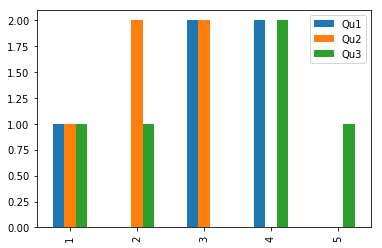

In [91]:
df = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                'Qu2': [2, 3, 1, 2, 3],
                'Qu3': [1, 5, 2, 4, 4]})
print df
print '\n'
print df.apply(pd.value_counts).fillna(0)
df.apply(pd.value_counts).fillna(0).plot(kind='bar')

## 处理缺失数据